In this notebook I derive equations (42-43) from [Moog Ladder Filter Generalizations Based On State Variable Filters](https://dafx2020.mdw.ac.at/proceedings/papers/DAFx2020_paper_70.pdf) using the substitution rule for trapezoidal integration as shown in [A generalized method for the derivation of non-linear state-space models from circuit schematics](https://www.hsu-hh.de/ant/wp-content/uploads/sites/699/2017/10/Holters-Z%C3%B6lzer-2015-A-Generalized-Method-for-the-Derivation-of-Non-linear-State-space-Models-from-Circuit-Schematics.pdf).

This method is equivalent to section 7.14 in [The Art of VA Filter Design 2.1.2](https://www.discodsp.net/VAFilterDesign_2.1.2.pdf).
***

Before we start I would like to correct some minor errors in section 6 in the original paper.

Following the somewhat complicated steps in section 7.14 in [The Art of VA Filter Design 2.1.2](https://www.discodsp.net/VAFilterDesign_2.1.2.pdf) we derive matrices $\tilde{\boldsymbol{A}}, \tilde{\boldsymbol{B}}, \tilde{\boldsymbol{C}}$ and $\tilde{\boldsymbol{D}}$.

We have equations for the outputs, *internal* variables and input signals of the TDF-II integrators respecitvely

\begin{align}
    \boldsymbol{u}[n] &= \boldsymbol{v}[n - 1] + \boldsymbol{w}[n], && \text{(3.3a) in Art of VA} \\
    \boldsymbol{v}[n] &= \boldsymbol{u}[n] + \boldsymbol{w}[n], && \text{(3.3b) in Art of VA} \\
    \boldsymbol{w}[n] &= \boldsymbol{H} (\boldsymbol{A}\boldsymbol{v}[n-1] + \boldsymbol{B}\boldsymbol{x}[n]),  && \text{(7.41) in Art of VA}.
\end{align}

Here $\boldsymbol{H} = g (\boldsymbol{I} - g\boldsymbol{A})^{-1}$ and $g = \frac{\omega_c T}{2}$, not $\frac{2\omega_c}{T}$ as written out in section 6 of [Moog Ladder Filter Generalizations Based On State Variable Filters](https://dafx2020.mdw.ac.at/proceedings/papers/DAFx2020_paper_70.pdf). Note that the units for the latter expression are [rad/s^2] whereas the latter one is [rad].

Now we have 

\begin{align}
      \boldsymbol{v}[n] &= \boldsymbol{u}[n] + \boldsymbol{w}[n] \\
                        &= \boldsymbol{v}[n - 1] + 2\boldsymbol{w}[n] \\
                        &= \underbrace{(2 \boldsymbol{H}\boldsymbol{A} + \boldsymbol{I})}_{\tilde{\boldsymbol{A}}}\boldsymbol{v}[n - 1] + \underbrace{2 \boldsymbol{H}\boldsymbol{B}}_{\tilde{\boldsymbol{B}}}\boldsymbol{x}[n]
\end{align}

We can find $\tilde{\boldsymbol{C}}, \tilde{\boldsymbol{D}}$ by substituting (3.3a) and (7.41) into (7.38b)

\begin{align}
    \boldsymbol{y}[n] &= \boldsymbol{C} \boldsymbol{u}[n] \\
        &= \boldsymbol{C} (\boldsymbol{v}[n - 1] + \boldsymbol{w}[n]) \\
        &= \boldsymbol{C} (\boldsymbol{v}[n - 1] + \boldsymbol{H} (\boldsymbol{A}\boldsymbol{v}[n-1] + \boldsymbol{B}\boldsymbol{x}[n])) \\
        &= \underbrace{\boldsymbol{C} (\boldsymbol{I} + \boldsymbol{H}\boldsymbol{A} )}_{\tilde{\boldsymbol{C}}} \boldsymbol{v}[n-1] + \underbrace{\boldsymbol{C}\boldsymbol{H}\boldsymbol{B}}_{\tilde{\boldsymbol{D}}} \boldsymbol{x}[n]
\end{align}

Note that here we find that $\tilde{\boldsymbol{D}} = \boldsymbol{C}\boldsymbol{H}\boldsymbol{B}$ but not $\boldsymbol{C} \boldsymbol{B}$ as written in the paper. 
***
As we can see below, these equations are not equivalent. For this particular circuit $\boldsymbol{C}\boldsymbol{B} = \boldsymbol{0}$ while $\boldsymbol{C}\boldsymbol{H}\boldsymbol{B}$ is non-zero (but still very small for some units I tried out).

In [77]:
from sympy import init_printing, symbols, ZeroMatrix, Identity, BlockMatrix, block_collapse, Matrix, eye, MatrixSymbol

init_printing(use_latex=True)

wc, T, r, k, gamma = symbols('\omega_c, T, r, k, \gamma')

A = Matrix([[-2*r, 1, 0, 4*k*r**2], [-1, 0, 0, 0], [0, -1, -2*r, 1], [0, 0, -1, 0]])
B = Matrix([[1, 0, 0, 0]]).T
C = Matrix([[0, 0, 0, -gamma]])

g = wc * T / 2
H = g * (eye(4) - g*A).inv()

assert C*B != C*H*B

C*B, C*H*B, (C*H*B).subs({wc: 1e3, T: 1/44.1e3, r: 0.5, k: 0.5, gamma:1})

⎛     ⎡                                                4                4     
⎜     ⎢                                               T ⋅\gamma⋅\omega_c      
⎜[0], ⎢───────────────────────────────────────────────────────────────────────
⎜     ⎢   4         4    2    4         4      3         3         2         2
⎝     ⎣4⋅T ⋅\omega_c ⋅k⋅r  + T ⋅\omega_c  + 8⋅T ⋅\omega_c ⋅r + 16⋅T ⋅\omega_c 

                                           ⎤                       ⎞
                                           ⎥                       ⎟
───────────────────────────────────────────⎥, [1.61518666903307e-8]⎟
  2      2         2                       ⎥                       ⎟
⋅r  + 8⋅T ⋅\omega_c  + 32⋅T⋅\omega_c⋅r + 16⎦                       ⎠

Now we derive the matrices using the substitution rule for trapezoidal integration as shown in [A generalized method for the derivation of non-linear state-space models from circuit schematics](https://www.hsu-hh.de/ant/wp-content/uploads/sites/699/2017/10/Holters-Z%C3%B6lzer-2015-A-Generalized-Method-for-the-Derivation-of-Non-linear-State-space-Models-from-Circuit-Schematics.pdf). Starting out with equations (37-38) in section 5 of [Moog Ladder Filter Generalizations Based On State Variable Filters](https://dafx2020.mdw.ac.at/proceedings/papers/DAFx2020_paper_70.pdf)

\begin{align}
  \frac{d}{dt} \boldsymbol{v} &= \omega_c \boldsymbol{A} \boldsymbol{v} + \omega_c \boldsymbol{B} x_\text{in}, \\
  y_\text{out} &= \boldsymbol{C} \boldsymbol{v}.
\end{align}

Rewriting these equations into a single block matrix yields

\begin{equation}
    \begin{bmatrix}
        -\omega_c \boldsymbol{A} & \boldsymbol{I} & \boldsymbol{0} \\
        -\boldsymbol{C} & \boldsymbol{0} & \boldsymbol{I} \\
    \end{bmatrix}
    \begin{pmatrix}
      \boldsymbol{v} \\
      \frac{d}{dt} \boldsymbol{v} \\
      y_\text{out}
    \end{pmatrix}
    =
    \begin{pmatrix}
      \omega_c \boldsymbol{B} x_\text{in} \\
      \boldsymbol{0}
    \end{pmatrix}.
\end{equation}
  
Now we substitude $\frac{d}{dt} \boldsymbol{v}$ and $\boldsymbol{v}$ using equations (11a) and (11b) from Holters

\begin{align}
  \frac{d}{dt} \boldsymbol{v}[n] &= \frac{1}{T}(\bar{v}[n] - \bar{v}[n - 1]), \\
  \boldsymbol{v}[n] &= \frac{1}{2}(\bar{v}[n] + \bar{v}[n-1])
\end{align}

where $\bar{v}[n] = \boldsymbol{v}[n] + \frac{T}{2}\frac{d}{dt} \boldsymbol{v}[n]$ is a *canonical state*, same as (3.3b) in [The Art of VA Filter Design 2.1.2](https://www.discodsp.net/VAFilterDesign_2.1.2.pdf) where $T = 1$.

We obtain the following

\begin{equation}
    \begin{bmatrix}
        -\omega_c \boldsymbol{A} & \boldsymbol{I} & \boldsymbol{0} \\
        -\boldsymbol{C} & \boldsymbol{0} & \boldsymbol{I} \\
    \end{bmatrix}
    \begin{pmatrix}
      \frac{1}{2}(\bar{v}[n] + \bar{v}[n-1]) \\
      \frac{1}{T}(\bar{v}[n] - \bar{v}[n-1]) \\
      y_\text{out}
    \end{pmatrix}
    =
    \begin{pmatrix}
      \omega_c \boldsymbol{B} x_\text{in} \\
      \boldsymbol{0}
    \end{pmatrix},
\end{equation}

that can we rewritten as

\begin{equation}
    \begin{bmatrix}
        -\frac{1}{2}\omega_c \boldsymbol{A} + \frac{1}{T} \boldsymbol{I} & \boldsymbol{0} \\
        -\frac{1}{2}\boldsymbol{C} & \boldsymbol{I} \\
    \end{bmatrix}
    \begin{bmatrix}
      \bar{v}[n] \\
      y_\text{out}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \frac{1}{2}\omega_c \boldsymbol{A} - \frac{1}{T} \boldsymbol{I} & \omega_c \boldsymbol{B} \\
        \frac{1}{2} \boldsymbol{C} & \boldsymbol{0}
    \end{bmatrix}
    \begin{bmatrix}
      \bar{v}[n-1] \\
      x_\text{in}
    \end{bmatrix}.
\end{equation}

Here we have a set of equations that we can easilly solve.

In [78]:
wc, T, m, n = symbols('\omega_c, T, m, n')
A = MatrixSymbol('A', n, n)
B = MatrixSymbol('B', n, m)
C = MatrixSymbol('C', m, n)
D = MatrixSymbol('D', m, m)

v = MatrixSymbol('v', n, m)
x = MatrixSymbol('x', m, m)
y = MatrixSymbol('y', m, m)

assert (A * v + B * x).shape == (n, m)  # (4, 1) for Kurt
assert (C * v + D * x).shape == (m, m)  # (1, 1) for Kurt

tmp = BlockMatrix([[-1/2 * wc *  A + 1 / T * Identity(n), ZeroMatrix(n, m)], 
                   [-1/2 * C, Identity(m)]])

tmp2 = BlockMatrix([[1/2 * wc * A + 1/T*Identity(n), wc * B], 
                    [1/2 * C, ZeroMatrix(m, m)]])

block_collapse(tmp.inv()*tmp2)

⎡                            -1                                               
⎢       ⎛1                  ⎞   ⎛1                   ⎞                     ⎛1 
⎢       ⎜─⋅𝕀 -0.5⋅\omega_c⋅A⎟  ⋅⎜─⋅𝕀 + 0.5⋅\omega_c⋅A⎟            \omega_c⋅⎜─⋅
⎢       ⎝T                  ⎠   ⎝T                   ⎠                     ⎝T 
⎢                                                                             
⎢                                   -1                                        
⎢              ⎛1                  ⎞   ⎛1                   ⎞                 
⎢0.5⋅C + 0.5⋅C⋅⎜─⋅𝕀 -0.5⋅\omega_c⋅A⎟  ⋅⎜─⋅𝕀 + 0.5⋅\omega_c⋅A⎟  0.5⋅\omega_c⋅C⋅
⎣              ⎝T                  ⎠   ⎝T                   ⎠                 

                  -1     ⎤
                 ⎞       ⎥
𝕀 -0.5⋅\omega_c⋅A⎟  ⋅B   ⎥
                 ⎠       ⎥
                         ⎥
                     -1  ⎥
⎛1                  ⎞    ⎥
⎜─⋅𝕀 -0.5⋅\omega_c⋅A⎟  ⋅B⎥
⎝T                  ⎠    ⎦

Finally we can rewrite these equations in terms of $\boldsymbol{H} = g (\boldsymbol{I} - g\boldsymbol{A})^{-1}$ and $g = \frac{\omega_c T}{2}$.

\begin{align}
    \tilde{\boldsymbol{A}} &= (\boldsymbol{I} - g\boldsymbol{A})^{-1}(\boldsymbol{I} + g\boldsymbol{A}) \\
        &= 2 \boldsymbol{H}\boldsymbol{A} + \boldsymbol{I}, \\
    \tilde{\boldsymbol{B}} &= 2 \boldsymbol{H}\boldsymbol{B}, \\
    \tilde{\boldsymbol{C}} &= \frac{1}{2} \boldsymbol{C} (\boldsymbol{I}  + (\boldsymbol{I} - g \boldsymbol{A})^{-1}(\boldsymbol{I} + g \boldsymbol{A}))  \\
    &= \boldsymbol{C} (\boldsymbol{H}\boldsymbol{A} + \boldsymbol{I}) ,\\
    \tilde{\boldsymbol{D}} &= \boldsymbol{C}\boldsymbol{H}\boldsymbol{B}.
\end{align}

These expressions match the results exactly when calculated using TPF-II as done above.

***

### $\alpha$-numerical scheme

Now I will extend this method to discretizing the general linear state-space

\begin{align}
  \frac{d}{dt} \boldsymbol{v} &= \boldsymbol{A} \boldsymbol{v} + \boldsymbol{B} \boldsymbol{x}, \\
  \boldsymbol{y} &= \boldsymbol{C} \boldsymbol{v} + \boldsymbol{D} \boldsymbol{x},
\end{align},

using the $\alpha$-numerical scheme as discussed in [Design principles for lumped model discretisation using Möbius transforms](https://www.ntnu.edu/documents/1001201110/1266017954/DAFx-15_submission_52.pdf). As shown in a time-varying system of the form $x(t) = y(x, t)$ may be discretized using the difference equation

\begin{equation}
    (1+\alpha)x[n] - (1+\alpha)x[n-1] = Ty[n]+\alpha Ty[n-1], \\
    x[n] = x[n-1] + \frac{T}{1+\alpha}y[n] + \frac{\alpha T}{1+\alpha}y[n-1]
\end{equation}

Now we need to find coefficients $a, b, c, d, e$ and $f$ that satisfy the following equations

\begin{align}
  \bar{v}[n] &= a \ \boldsymbol{v}[n] + b \ \frac{d}{dt} \boldsymbol{v}[n], \\
  \frac{d}{dt} \boldsymbol{v}[n] &= c \ \bar{v}[n] + d \ \bar{v}[n - 1], \\
  \boldsymbol{v}[n] &= e \ \bar{v}[n] + f \ \bar{v}[n-1]
\end{align}

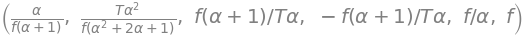

In [141]:
from sympy import *
a, b, c, d, e, f = symbols('a, b, c, d, e, f')
alpha, T = symbols("\\alpha, T")
sol, *_ = solve(
    (
        Eq(c * a + d * a, 0),
        Eq(c * a * T / (1 + alpha) + c * b, 1),
        Eq(c * a * T * alpha / (1 + alpha) + d * b, 0),
        Eq(f * a / (1 - e * a), 1),
        Eq(e * b / (1 - e * a), T / (1 + alpha)),
        Eq(f * b / (1 - e * a), alpha * T / (1 + alpha)),
    ),
    (a, b, c, d, e, f), exclude=(alpha, T))

sol

We need to find a value for $f$ so that when $\alpha = 1$ we get the same coefficients as above. First we try choosing $f = \frac{1}{2}$ that yields the desired coefficients

In [128]:
nsimplify(tuple(map(lambda s: s.subs({f:1/2, alpha:1}), sol)))

The Forward Euler numerical scheme ($\alpha\rightarrow\infty$) behaves nicely

In [133]:
nsimplify(tuple(map(lambda s: limit(s.subs({f:1/2}), alpha, oo), sol)))

However if we run the limit for the Backward Euler numerical scheme, when $\alpha\rightarrow0$ we get unbound coefficients

In [138]:
nsimplify(tuple(map(lambda s: limit(s.subs({f:1/2}), alpha, 0), sol)))

Another approach is to choose $f = \frac{\alpha}{2}$ that achieves the desired approach when $\alpha = 1$

In [137]:
tuple(map(lambda s: s.subs({f:alpha/2}).subs({alpha:1}), sol))

and has bounded coefficients as $\alpha \leftarrow 0$

In [136]:
tuple(map(lambda s: limit(s.subs({f:alpha/2}), alpha, 0), sol))

However, now we get unbound coefficients as $\alpha\rightarrow\infty$

In [119]:
tuple(map(lambda s: limit(s.subs({f:alpha/2}), alpha, oo), sol))

Unsurprisingly there is a tradeoff in the choice of $f$, as was discussed in detail in [Design principles for lumped model discretisation using Möbius transforms](https://www.ntnu.edu/documents/1001201110/1266017954/DAFx-15_submission_52.pdf). For the remainder of this document let's assume $f = \frac{\alpha}{2}$ as we are more likely to be using Backward than Forward Euler